<a href="https://colab.research.google.com/github/fweberling/epistasis/blob/main/Epistasis_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
from analysis_utils import preprocessing, double_mut_pos, epistasis_graph, epistatic_triangles
from plotting_utils import plot_obs_fitness_heatmap, plot_node_degree_distribution

In [2]:
# Specify order of mutations to be analysed
num_mut = 2

# Upload input files into panda data frame
data_frame = pd.read_csv('CPA_merge_filtered.csv')

# Specify sequence of reference protein
reference = "MRDTDVTVLGLGLMGQALAGAFLKDGHATTVWNRSEGKAGQLAEQGAVLASSARDAAEASPLVVVCVSDHAAVRAVLDPLGDVLAGRVLVNLTSGTSEQARATAEWAAERGITYLDGAIMAIPQVVGTADAFLLYSGPEAAYEAHEPTLRSLGAGTTYLGADHGLSSLYDVALLGIMWGTLNSFLHGAALLGTAKVEATTFAPFANRWIEAVTGFVSAYAGQVDQGAYPALDATIDTHVATVDHLIHESEAAGVNTELPRLVRTLADRALAGGQGGLGYAAMIEQFRSPS*"


In [3]:
# Preprocess the data
preprocessed_data = preprocessing(data_frame, 2, reference)

Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel detected
Indel dete

In [4]:
# Unpack the preprocessed data
single_mut_W_observed_std = preprocessed_data["Single Mutations"]["Observed std of fitness"]
sequence_double_list = preprocessed_data["Higher Order Mutations"]["Higher order mutants"]
W_observed_list = preprocessed_data["Higher Order Mutations"]["Observed fitness"]
W_observed_std_list = preprocessed_data["Higher Order Mutations"]["Observed std of fitness"]
W_expected_list = preprocessed_data["Higher Order Mutations"]["Expected fitness"]
W_expected_std_list = preprocessed_data["Higher Order Mutations"]["Expected std of fitness"]
epistatic_score_list = preprocessed_data["Higher Order Mutations"]["Epistatic score"]

In [5]:
# Create a list of positive and combinable positions of double mutations
pos_comb_double_mut_list = double_mut_pos(epistatic_score_list, W_observed_list, W_expected_std_list,
                                          W_observed_std_list, sequence_double_list, reference)

In [6]:
# Determine all epistatic triangles for all AA positions
epistatic_triangle_list = epistatic_triangles(pos_comb_double_mut_list)
print(" Epistatic triangles: ", epistatic_triangle_list)

 Epistatic triangles:  [[24.0, 241.0, 287.0], [51.0, 93.0, 120.0], [98.0, 130.0, 193.0]]


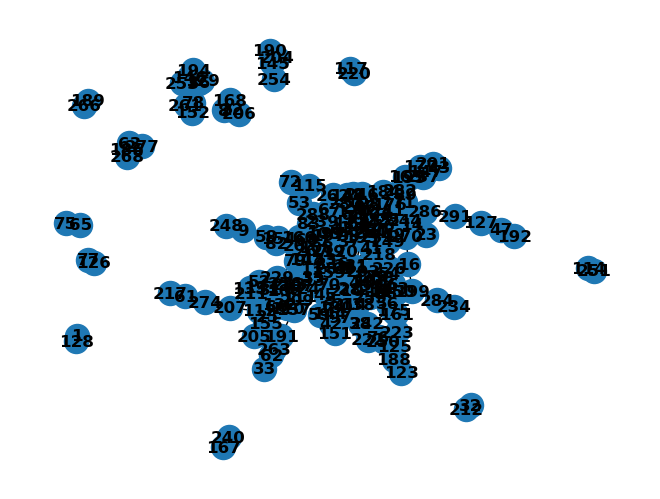

In [7]:
# Create epistasis double_mut_epistasis_graph given list of double mutation positions
double_mut_epistasis_graph = epistasis_graph(pos_comb_double_mut_list)

# Plot epistasis double_mut_epistasis_graph
nx.draw(double_mut_epistasis_graph, with_labels=True, font_weight='bold')
plt.show()

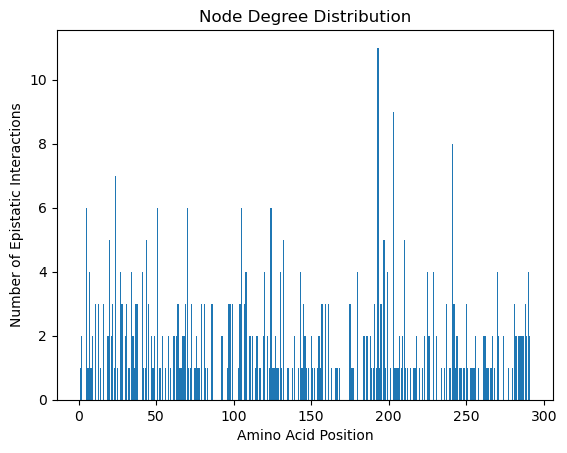

In [8]:
# Node degree analysis (node, degree) in descending order
plot_node_degree_distribution(double_mut_epistasis_graph)

/var/folders/6b/kr22njw92zg2jfmwmlnclt800000gq/T/ipykernel_60451/2215372058.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  double_mut_epistasis_graph_A = nx.adjacency_matrix(double_mut_epistasis_graph).todense()


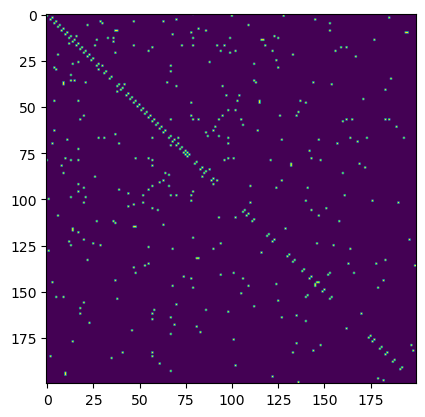

In [9]:
# Plot adjacency matrix
double_mut_epistasis_graph_A = nx.adjacency_matrix(double_mut_epistasis_graph).todense()
plt.imshow(double_mut_epistasis_graph_A)
plt.show()

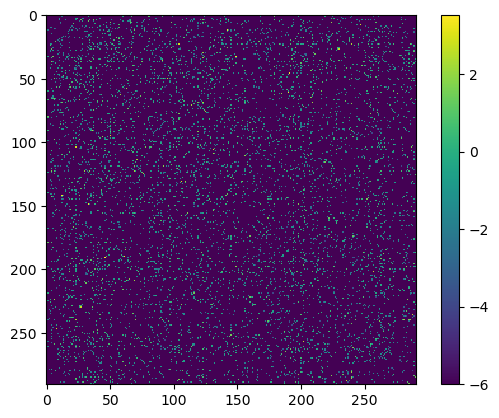

In [10]:
# Fitness Heatmap
plot_obs_fitness_heatmap(reference, sequence_double_list, W_observed_list)